## About the Dataset 
+ id : unique id for a news article
+ title : the title of a news article
+ author : author of the news article
+ text : the text of the article; could be incomplete
+ label : a label that marks the article as potentially unreliable
    ` 1: Fake news
      0: Real News`

In [8]:
!python3 -m pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 14.0 MB/s eta 0:00:0000:0100:01


In [49]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , log_loss
import matplotlib.pyplot as plt

In [3]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Preprocessing

In [4]:
# loading the dataset to a pandas DataFrame
data = pd.read_csv('train.csv')

In [14]:
data.shape

(20800, 5)

In [15]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
data = data.fillna(' ')

## for our model we will use the title and author name as our features and label column as our target
data[content] = data['author'] + ' ' + data['title']


In [8]:
data["content"] = data['author'] + ' ' + data["title"]

In [9]:
print(data["content"])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [11]:
# separating the data & label
X = data.drop(columns='label', axis=1)
Y = data['label']

In [12]:
print(X)
print(Y)

          id                                              title   
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...  \
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author   
0                                  Darrell Lucus  \
1                                Daniel J. Flynn   
2                             Consortiu

# Stemming 
Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form. The stem need not be identical to the morphological root of the word; it is usually sufficient that related words map to the same stem, even if this stem is not in itself a valid root.
example : actor,acting,acted,action all these words have same root word act

In [13]:
# defining the stemming functoin which will remove all the suffices like "ing", "ly", "es", "s" etc
ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()

    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [14]:
data['content'] = data['content'].apply(stemming)

In [19]:
print(data['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [20]:
# separing the data & label for training and storing them into numpy array
# here x and y are numpy array storing the values of data and label respectively
X = data['content'].values
Y = data['label'].values

In [21]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [22]:
Y.shape

(20800,)

In [23]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [24]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

# spliting the data into train and test set
 we will use 80% of the data for training and 20% for testing 
 we will use random state = 2 so that we get same result everytime we run the code
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, stratify = Y,random_state=2)

In [25]:
# splitting the dataset to training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Traing the model

In [26]:
# training the model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

# Evaluation

In [27]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


In [28]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


In [43]:
X_train.shape

(16640, 17128)

In [44]:
print(X_train[0])

  (0, 16996)	0.09995656818816077
  (0, 16928)	0.3360072514082535
  (0, 15295)	0.09807665903342763
  (0, 13914)	0.3334797245354899
  (0, 13014)	0.2680313811122545
  (0, 12501)	0.3929876463935473
  (0, 11936)	0.24142639024498436
  (0, 10306)	0.09662001419895176
  (0, 10219)	0.3019527708144002
  (0, 3155)	0.3400831511004003
  (0, 2794)	0.3776836172783757
  (0, 336)	0.3360072514082535


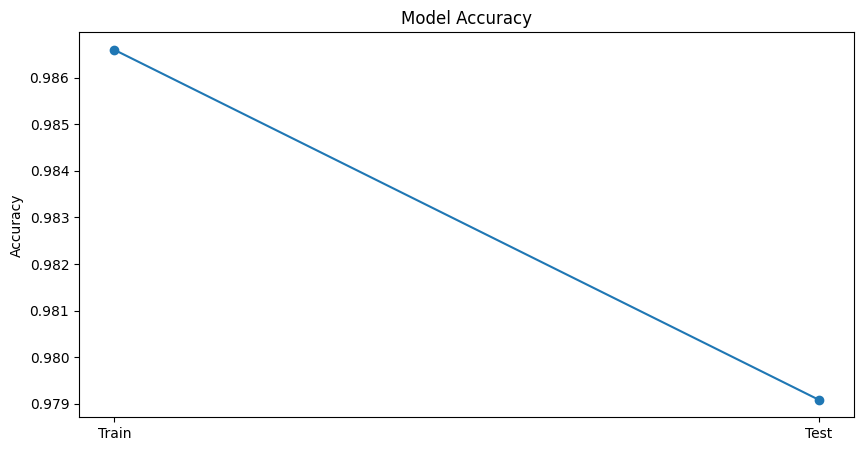

In [46]:
plt.figure(figsize=(10, 5))
plt.plot([1, 2], [training_data_accuracy, test_data_accuracy], 'o-')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xticks([1, 2], ['Train', 'Test'])
plt.show()

In [30]:
# making a predictive system
X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
    print('The news is Real')
else:
    print('The news is Fake')

[0]
The news is Real


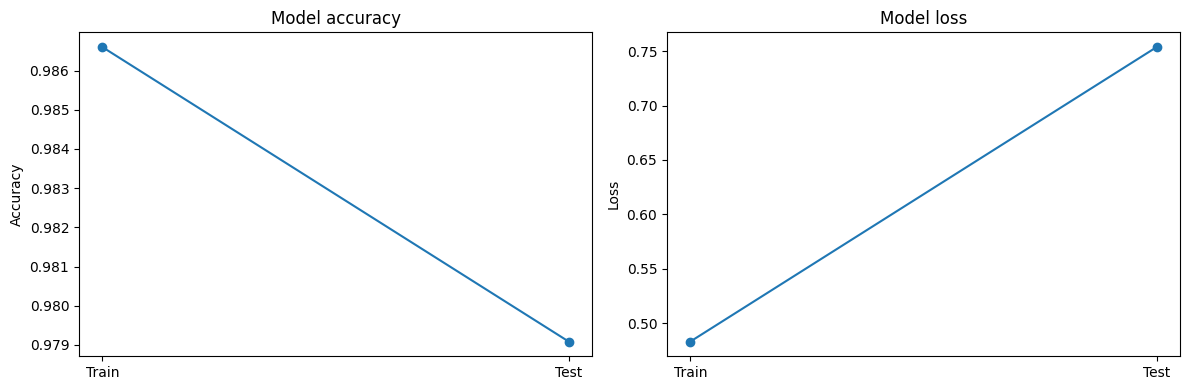

In [50]:
# Make predictions on the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate the accuracy and loss on the training data
train_accuracy = accuracy_score(Y_train, train_predictions)
train_loss = log_loss(Y_train, train_predictions)

# Calculate the accuracy and loss on the testing data
test_accuracy = accuracy_score(Y_test, test_predictions)
test_loss = log_loss(Y_test, test_predictions)

# Now you can plot the accuracy and loss for the training and testing data
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([1, 2], [train_accuracy, test_accuracy], 'o-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xticks([1, 2], ['Train', 'Test'])

plt.subplot(1, 2, 2)
plt.plot([1, 2], [train_loss, test_loss], 'o-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xticks([1, 2], ['Train', 'Test'])

plt.tight_layout()
plt.show()

In [51]:
!python3 -m pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 4.1 MB/s eta 0:00:00a 0:00:01


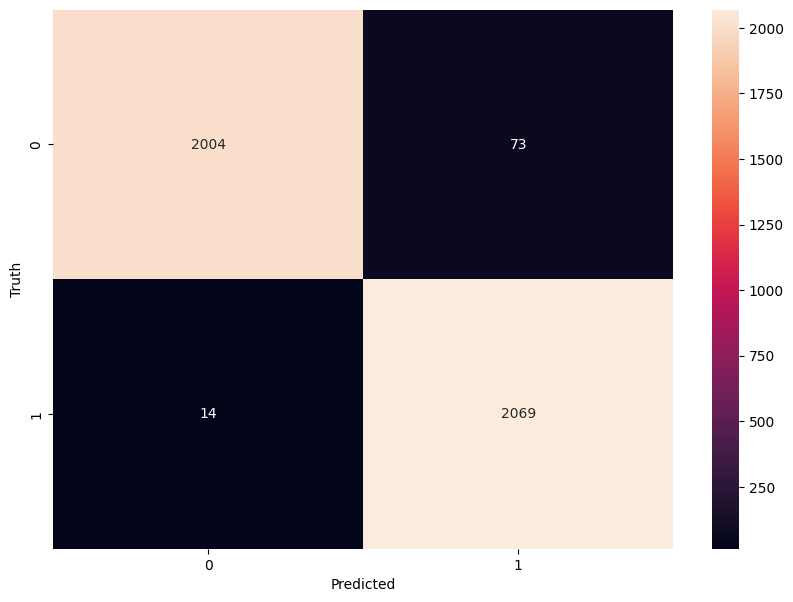

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test are the true labels and y_pred are the predicted labels
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

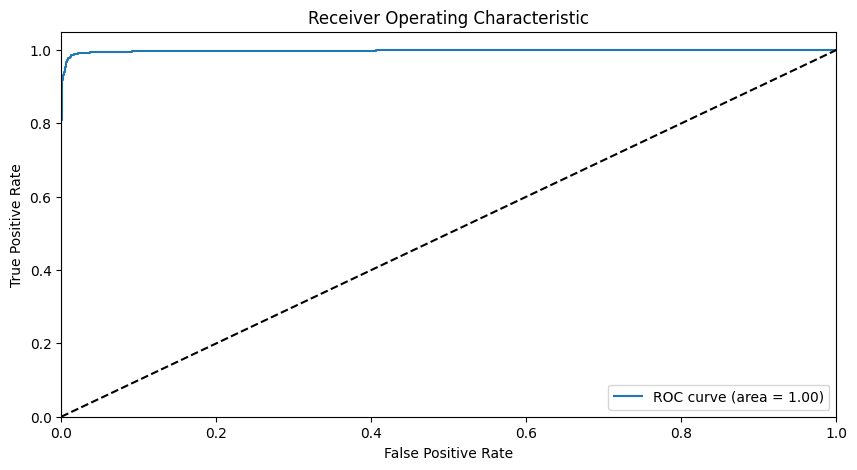

In [53]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test are the true labels and y_scores are the predicted scores
Y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_scores)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()